In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl


## Data exploration from dataset without domains and labels
### Selecting IDs from non-annotated dataset 

In [28]:
df = pd.read_table("./processed/covid_data_without_levels_anonimized.csv", sep=',' , index_col=0)

df.head()

,institution,MDN,NotitieID,Typenotitie,Notitiedatum,annotated
0,amc,22519835415,441723070,Voortgangsverslag,2020-08-27,False
1,amc,14639256525,448286506,MDO-verslag,2020-09-17,False
2,amc,14433181440,430879587,MDO-verslag,2020-07-13,False
3,amc,14535299280,343255451,NaN,2020-07-24,False
4,amc,14535299280,432744119,Voortgangsverslag,2020-07-20,False


In [26]:
#number of unique patients
unique_id = df['MDN'].unique()
df['MDN'].nunique() #1290 unique ids

1290

In [4]:
#group by unique patients
df_grouped_ind = df.groupby(['MDN']).count()
df_grouped_ind

,institution,NotitieID,Typenotitie,Notitiedatum,annotated
MDN,,,,,
11572,37,37,34,37,37
20483,82,82,63,82,82
54466,127,127,112,127,127
54800,4,4,4,4,4
65329,53,53,47,53,53
...,...,...,...,...,...
9919616,31,31,29,31,31
9924555,63,63,60,63,63
9932109,33,33,32,33,33


In [5]:
df_filtered100 =df.groupby(['MDN']).filter(lambda x: len(x) > 100)
df_filtered100.nunique()

df_filtered500 =df.groupby(['MDN']).filter(lambda x: len(x) > 500)
df_filtered1000 =df.groupby(['MDN']).filter(lambda x: len(x) > 1000)

/Users/brunaguedes/opt/anaconda3/envs/smenv/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:title={'center':'Annotations frequency over time - over 1000 notes'}, xlabel='Notitiedatum'>

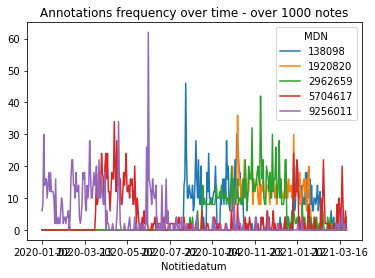

In [6]:
pd.crosstab(df_filtered1000['Notitiedatum'], df_filtered1000['MDN']).plot(title= 'Annotations frequency over time - over 1000 notes')

/Users/brunaguedes/opt/anaconda3/envs/smenv/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:title={'center':'Annotations frequency over time - over 500 notes'}, xlabel='Notitiedatum'>

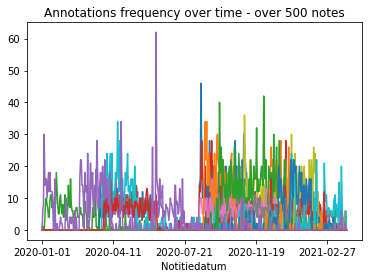

In [7]:
pd.crosstab(df_filtered500['Notitiedatum'], df_filtered500['MDN']).plot(legend=False, title= 'Annotations frequency over time - over 500 notes')

In [8]:
#grouped by patients and date to see the spread on notes within each patient
df.groupby(['MDN', 'Notitiedatum']).count()

institution  NotitieID  Typenotitie  annotated
MDN     Notitiedatum                                                
11572   2020-12-27              4          4            3          4
        2020-12-28              7          7            7          7
        2020-12-29              7          7            7          7
        2020-12-30              9          9            7          9
        2020-12-31              4          4            4          4
...                           ...        ...          ...        ...
9964647 2020-06-19              1          1            0          1
        2020-09-01              1          1            1          1
        2020-09-02              3          3            2          3
        2020-09-04              2          2            0          2
        2020-09-22              1          1            0          1

[26195 rows x 4 columns]

In [9]:
#how many annotated data per group
print(df_filtered100.annotated.value_counts())
print(df_filtered500.annotated.value_counts())
print(df_filtered1000.annotated.value_counts())

False    84494
True      1361
Name: annotated, dtype: int64
False    18443
True       196
Name: annotated, dtype: int64
False    6453
True       65
Name: annotated, dtype: int64


In [10]:
data = [{'uniqueID':df_filtered100['MDN'].nunique(), 'annotated': df_filtered100.annotated.value_counts()[1], 'not annoated': df_filtered100.annotated.value_counts()[0], 'total notes':df_filtered100.shape[0]},
        {'uniqueID':df_filtered500['MDN'].nunique(), 'annotated': df_filtered500.annotated.value_counts()[1], 'not annoated': df_filtered500.annotated.value_counts()[0], 'total notes':df_filtered500.shape[0]},
        {'uniqueID':df_filtered1000['MDN'].nunique(), 'annotated': df_filtered1000.annotated.value_counts()[1], 'not annoated': df_filtered1000.annotated.value_counts()[0], 'total notes':df_filtered1000.shape[0]}]
 
# Creates DataFrame.
df_summary = pd.DataFrame(data, index =['>100 per ID', '>500 per ID', '>1000 per ID'])
df_summary

,uniqueID,annotated,not annoated,total notes
>100 per ID,353,1361,84494,85855
>500 per ID,25,196,18443,18639
>1000 per ID,5,65,6453,6518


In [11]:
df_filtered500['MDN'].unique()

array([5704617, 8089852, 4321077, 9256011, 1610429, 4326354, 2149576,
       1831037, 6094811, 7090139, 1920820, 5039126, 3157119, 2793467,
        138098, 1785709, 2962659, 7567665, 4605556, 1948163, 1451793,
       1901604, 1907258, 4507976, 1903219])